# 0. 참고자료  
## 0-1. 도서  
- 비제이퍼블릭 | 한주현 저-바이오파이썬으로 만나는 생물정보학  

## 0-2. 웹 사이트
- 인코덤    | [인코덤 링크](www.incodom.kr/)  
- wikipedia | [위키피디아 링크](https://ko.wikipedia.org/wiki/)  

## 0-3. 데이터셋 출처
- 바이오 파이썬으로 만나는 생물정보학 깃헙 | [깃헙 링크](https://github.com/bjpublic/biopython) 

### (!) sequence alignment (서열 정렬)  
    (1) 유전자나 단백질의 서열을 다이내믹 프로그래밍 기반의 컴퓨터 스트링 정렬 알고리즘을 이용하여 배열  
    (2) 쌍서열정렬(pairwise sequence alignment)와 다중서열정렬(multiple sequence alignment)로 나뉜다.

# 1. Multiple Sequence Alignment (MSA / 다중 서열 정렬)
- 3개 이상의 DNA, RNA, Protein과 같은 서열들을 sequence alignment를 진행하는 것을 말한다.  
- 단백질 서열간 유사성을 통해 단백질의 기능을 이해, 구조 예측, 진화 관계 규명하는데 사용된다.  
- Multiple Sequence Alignment를 하기 위해서는 3가지 단계가 필요하다.
    1. 한 서열과 비교할 여러 서열이  필요하다
    2. MUSCLE 툴을 통해 Multiple Sequence Alignment를 수행한다.
    3. Multiple Sequence Aligment를 시각화 한다.

## 1-1. biopython에서의 Multiple Sequence Alignment
- biopython에서 Multiple Sequence Alignment 파일을 읽기 위해 AlignIO 모듈의 read메소드를 사용한다.
- Align.read() 메소드는 두 입력 인자를 받는다.  
    1. 파일이나 파일을 연 객체  
    2. multiple sequence가 담긴 파일 종류   

### a. Alignment 다루기  
- AlignIO 파일을 읽어들여 생성된 MultipleSeqAlignment 객체에 SeqRecord 객체가 들어있다. 
- SeqRecord 객체의 seq, id 속성은 파이썬의 문자열과 같이 슬라이싱이 가능하다

In [20]:
from Bio import AlignIO


## multi alignment 파일 읽기
alignment = AlignIO.read('../dataset/aln/example.aln', "clustal")
print(f'alignment : {type(alignment)}, {len(alignment)}\n{alignment}\n')

for idx, record in enumerate(alignment, 1):
    print(f'[{idx}] Alignment 레코드 정보 ({type(record)})\nid : {record.id} \nSequence : {record.seq[:70]} \n')

alignment : <class 'Bio.Align.MultipleSeqAlignment'>, 3
Alignment with 3 rows and 142 columns
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYF...KYR sp|P69905|HBA_HUMAN
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYF...KYR sp|P69907|HBA_PANTR
MVLSGEDKSNIKAAWGKIGGHGAEYGAEALERMFASFPTTKTYF...KYR sp|P01942|HBA_MOUSE

[1] Alignment 레코드 정보 (<class 'Bio.SeqRecord.SeqRecord'>)
id : sp|P69905|HBA_HUMAN 
Sequence : MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNA 

[2] Alignment 레코드 정보 (<class 'Bio.SeqRecord.SeqRecord'>)
id : sp|P69907|HBA_PANTR 
Sequence : MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHGKKVADALTNA 

[3] Alignment 레코드 정보 (<class 'Bio.SeqRecord.SeqRecord'>)
id : sp|P01942|HBA_MOUSE 
Sequence : MVLSGEDKSNIKAAWGKIGGHGAEYGAEALERMFASFPTTKTYFPHFDVSHGSAQVKGHGKKVADALASA 



### b. MUSCLE (Multiple Sequence Comparison by Log-Expectation)
- 대표적인 alignment tool로 1초에 수백기의 서열을 alignment할 수 있음.  
- Phylogenetic tree 구성을 위한 대량의 데이터를 활용하기에 매우 유용함.  
- 기존 Alignment 정보에 새로운 서열을 추가하여 update하거나 각 구성되어 있는 alignment profile간 비교도 가능 


- 설치 및 사용법  
→ 설치 링크에서 파일을 다운로드 받고 압축을 해제한 후에 터미널에 다음 커맨드를 입력한다.
|운영체제|설치 링크|실행 방법|
|:-:|:---:|:---:|
|Linux|[설치 링크](http://www.drive5.com/muscle/downloads3.8.31/muscle3.8.31_i86linux64.tar.gz )|muscle3.8.31_i86linux64 -in in.fasta -out out.aln|
|Mac OSX|[설치 링크](http://www.drive5.com/muscle/downloads3.8.31/muscle3.8.31_i86darwin64.tar.gz)|muscle3.8.31_i86darwin64 -in in.fasta -out out.aln|
|Windows|[설치 링크](http://www.drive5.com/muscle/downloads3.8.31/muscle3.8.31_i86win32.exe)|muscle3.8.31_i86win32 -in in.fasta -out out.aln|

#### b-(1). 바이오파이썬을 통한 MUSCLE 실행
- 바이오파이썬에서 MUSCLE을 실행하기 위해서는 MUSCLE이 다운로드되어 있어야 한다.  
- MuscleCommandline함수에서 MUSCLE의 실행 파일 경로를 인자값으로 받는다.


In [35]:
from Bio.Align.Applications import MuscleCommandline
import os

muscle_path = '../utils/muscle'

cmd_line = MuscleCommandline(muscle_path, input = '../dataset/fasta/HBA.all.fasta', 
                             out="../dataset/aln/HBA.all.aln", clw=" ")

## cmd_line에 저장되어 있는 명령어가 터미널에서 입력되는것과 같은 역할을 함.
## 이 코드와 비슷한 역할
# os.system('../utils/muscle -in ../dataset/fasta/HBA.all.fasta 
#           -out ../dataset/aln/HBA-2.all.aln -clw')

print(f'command line : {cmd_line}')
std_out, std_err = cmd_line()

command line : ../utils/muscle -in ../dataset/fasta/HBA.all.fasta -out ../dataset/aln/HBA.all.aln -clw


#### (!) biopython에서 MUSCLE을 수행한 결과 
- 파일 경로 : ../dataset/aln/HBA.all.aln

~~~  
MUSCLE (3.8) multiple sequence alignment


sp|P01994|HBA_CHICK      MVLSAADKNNVKGIFTKIAGHAEEYGAETLERMFTTYPPTKTYFPHFDLSHGSAQIKGHG
sp|P18971|HBA_BALAC      MVLSPTDKSNVKATWAKIGNHGAEYGAEALERMFMNFPSTKTYFPHFDLGHDSAQVKGHG
sp|P01948|HBA_RABIT      MVLSPADKTNIKTAWEKIGSHGGEYGAEAVERMFLGFPTTKTYFPHFDFTHGSEQIKAHG
sp|P01942|HBA_MOUSE      MVLSGEDKSNIKAAWGKIGGHGAEYGAEALERMFASFPTTKTYFPHFDVSHGSAQVKGHG
sp|P69907|HBA_PANTR      MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHG
sp|P69905|HBA_HUMAN      MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHG
sp|P01958|HBA_HORSE      MVLSAADKTNVKAAWSKVGGHAGEYGAEALERMFLGFPTTKTYFPHFDLSHGSAQVKAHG
                         ****  **.*:*  : *:. *. *****::****  :*.*********. *.* *:*.**

sp|P01994|HBA_CHICK      KKVVAALIEAANHIDDIAGTLSKLSDLHAHKLRVDPVNFKLLGQCFLVVVAIHHPAALTP
sp|P18971|HBA_BALAC      KKVADALTKAVGHMDNLLDALSDLSDLHAHKLRVDPANFKLLSHCLLVTLALHLPAEFTP
sp|P01948|HBA_RABIT      KKVSEALTKAVGHLDDLPGALSTLSDLHAHKLRVDPVNFKLLSHCLLVTLANHHPSEFTP
sp|P01942|HBA_MOUSE      KKVADALASAAGHLDDLPGALSALSDLHAHKLRVDPVNFKLLSHCLLVTLASHHPADFTP
sp|P69907|HBA_PANTR      KKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTP
sp|P69905|HBA_HUMAN      KKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTP
sp|P01958|HBA_HORSE      KKVGDALTLAVGHLDDLPGALSNLSDLHAHKLRVDPVNFKLLSHCLLSTLAVHLPNDFTP
                         ***  **  *. *:*:: .:** *************.*****.:*:* .:* * *  :**

sp|P01994|HBA_CHICK      EVHASLDKFLCAVGTVLTAKYR
sp|P18971|HBA_BALAC      SVHASLDKFLASVSTVLTSKYR
sp|P01948|HBA_RABIT      AVHASLDKFLANVSTVLTSKYR
sp|P01942|HBA_MOUSE      AVHASLDKFLASVSTVLTSKYR
sp|P69907|HBA_PANTR      AVHASLDKFLASVSTVLTSKYR
sp|P69905|HBA_HUMAN      AVHASLDKFLASVSTVLTSKYR
sp|P01958|HBA_HORSE      AVHASLDKFLSSVSTVLTSKYR
                          *********. *.****:***  
~~~

# 2. WebLogo
- Multi Sequence Alignment에서 각 행 서열의 공통부분 비율만큼 시각해 그려줌.  
- WebLogo 그려주는 홈페이지 | [링크](http://weblogo.threeplusone.com/)

In [114]:
%%time
from collections import Counter
from Bio import SeqIO
import pandas as pd
import numpy as np

sequences = SeqIO.parse('../dataset/fasta/example.fasta', 'fasta')

## 문자열 자릿수에 엄기 갯수를 구해주는 부분
def count_table(seq_list):
    counter_table = {}
    for idx, seq in enumerate(seq_list):
        count_acid = Counter(seq)
        default_dict = {}
        
        for acid in ('A', 'G', 'C', 'T'):
            default_dict[acid] = count_acid[acid] if acid in count_acid.keys() else 0
                
        counter_table[idx] = default_dict
        
    return counter_table

seq_list = []
for sequence in sequences: seq_list.append(sequence.seq)
print(f'염기서열 행렬 : \n{np.array(sequence_dict)}\n')

t_seq_list = np.transpose(seq_list)
print(f'염기서열 전치 행렬 : \n{t_seq_list}\n')

acid_dataframe = pd.DataFrame(count_table(t_seq_list))
print(f'각 자리별 염기서열 갯수 : \n{acid_dataframe}')

염기서열 행렬 : 
[['T' 'A' 'C' 'A' 'A']
 ['T' 'A' 'C' 'G' 'C']
 ['T' 'A' 'C' 'A' 'C']
 ['T' 'A' 'C' 'C' 'C']
 ['A' 'A' 'C' 'C' 'C']
 ['A' 'A' 'T' 'G' 'C']
 ['A' 'A' 'T' 'G' 'C']]

염기서열 전치 행렬 : 
[['T' 'T' 'T' 'T' 'A' 'A' 'A']
 ['A' 'A' 'A' 'A' 'A' 'A' 'A']
 ['C' 'C' 'C' 'C' 'C' 'T' 'T']
 ['A' 'G' 'A' 'C' 'C' 'G' 'G']
 ['A' 'C' 'C' 'C' 'C' 'C' 'C']]

각 자리별 염기서열 갯수 : 
   0  1  2  3  4
A  3  7  0  2  1
G  0  0  0  3  0
C  0  0  5  2  6
T  4  0  2  0  0
CPU times: user 10 ms, sys: 1e+03 µs, total: 11 ms
Wall time: 10.8 ms


## 2-1. biopython으로 WebLogo 그리기  
- biopython에서 WebLogo를 그리기 위한 방법으로는 두 가지 과정을 거친다.  
  (1) biopython motifs 모듈의 create() 메소드를 이용해 Motif 객체를 만듦.  
  (2) biopython Motif 모듈의 weblogo() 메소드로 weblogo를 그린다.  

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.5 µs
각 자리별 염기서열 갯수 2 : 
        0      1      2      3      4
A:   3.00   7.00   0.00   2.00   1.00
C:   0.00   0.00   5.00   2.00   6.00
G:   0.00   0.00   0.00   3.00   0.00
T:   4.00   0.00   2.00   0.00   0.00



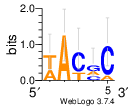

In [138]:
%time
from Bio.motifs import Motif
from Bio.Seq import Seq
from Bio import motifs

sequences = SeqIO.parse('../dataset/fasta/example.fasta', 'fasta')
instances = []

for sequence in sequences: instances.append(Seq(sequence.seq))

m = motifs.create(instances)
print(f'각 자리별 염기서열 갯수 2 : \n{m.counts}')
Motif.weblogo(m, '../Weblogo/dummy.png')

## 주피터 내에서 생성한 Weblogo 파일 보이기
from IPython.display import Image
Image('../Weblogo/dummy.png')


## 2-2. Multi Sequence Alignment WebLogo 그리기   
- biopython 1.78 이후로 Bio.alphabet 기능이 사라져 motifs.create 함수에서 alphabet을 인자값으로 직접 넣어주었다

VLEPFNIASHTGKDYQRWMC


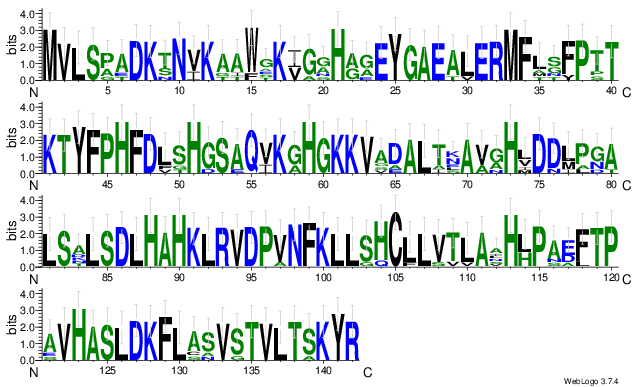

In [153]:
hba_MSA = AlignIO.read('../dataset/aln/HBA.aln', 'clustal')

proteins = []
alphabet_set = set()
for hba in hba_MSA:
    alphabet_set = alphabet_set.union(set(hba.seq))
    proteins.append(hba.seq)
    
alphabet_set = ''.join(alphabet_set)
print(alphabet_set)

m = motifs.create(proteins, alphabet=alphabet_set)
Motif.weblogo(m, '../Weblogo/hba_multiple.png')
Image('../Weblogo/hba_multiple.png')

# 3. 계통수 그리기
- 계통수한 생물 종 간 유전적 유사도를 가지고 멀고 가까움을 그림으로 표현한 것이다.
- 계통수를 표현하는 파일 종류는 다양하며 newick 포맷을 가지고 계통수를 그린다.
- Sequence Alignment 파일에서 newick 파일로 만드는 홈페이지 | [링크](http://www.ebi.ac.uk/Tools/services/web_clustalw2_phylogeny/toolform.ebi)

## 3-1. biopython으로 계통수 그리기
- Phylo.read() 메소드로 newick 파일을 읽는다.   
- Phylo.draw() 메소드로 계통수 그림을 그린다.

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00537)
            Clade(branch_length=0.29387, name='sp|P01994|HBA_CHICK')
            Clade(branch_length=0.01203)
                Clade(branch_length=0.01282)
                    Clade(branch_length=0.1181, name='sp|P60529|HBA_CANLF')
                    Clade(branch_length=0.10357, name='sp|P01948|HBA_RABIT')
                Clade(branch_length=0.00617)
                    Clade(branch_length=0.05673)
                        Clade(branch_length=0.0, name='sp|P69907|HBA_PANTR')
                        Clade(branch_length=0.0, name='sp|P69905|HBA_HUMAN')
                    Clade(branch_length=0.07405, name='sp|P01958|HBA_HORSE')
        Clade(branch_length=0.13313, name='sp|P18971|HBA_BALAC')
        Clade(branch_length=0.06808, name='sp|P01942|HBA_MOUSE')


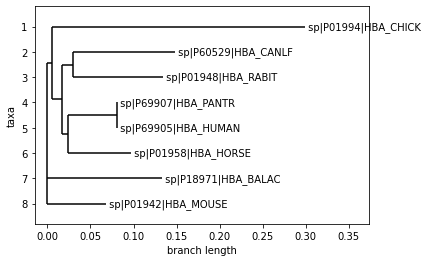

In [155]:
from Bio import Phylo

tree = Phylo.read('../dataset/newick/HBA.newick', 'newick')
print(tree)

Phylo.draw(tree)